## **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

## **Importing Dataset**

In [ ]:
data = pd.read_csv("/content/water_dataX.csv", encoding= 'unicode_escape')

In [ ]:
data.head(5)

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


## **Information of data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

## **Removing unnecessary columns**

In [ ]:
data.drop(columns = ["STATION CODE","LOCATIONS","STATE","year","Temp"], inplace= True)

In [ ]:
data.head()

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,6.7,7.5,203,NAN,0.1,11,27
1,5.7,7.2,189,2,0.2,4953,8391
2,6.3,6.9,179,1.7,0.1,3243,5330
3,5.8,6.9,64,3.8,0.5,5382,8443
4,5.8,7.3,83,1.9,0.4,3428,5500


## **Changing data types of columns**

In [ ]:
data['PH'] = data["PH"].astype(float)
data['D.O. (mg/l)'] = data["D.O. (mg/l)"].astype(float)


In [ ]:
data['CONDUCTIVITY (µmhos/cm)'] = data["CONDUCTIVITY (µmhos/cm)"].astype(float)
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(data['FECAL COLIFORM (MPN/100ml)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes


D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
dtype: object

## **Correlation of data columns**

<Axes: title={'center': 'Heatmap for Correlation'}>

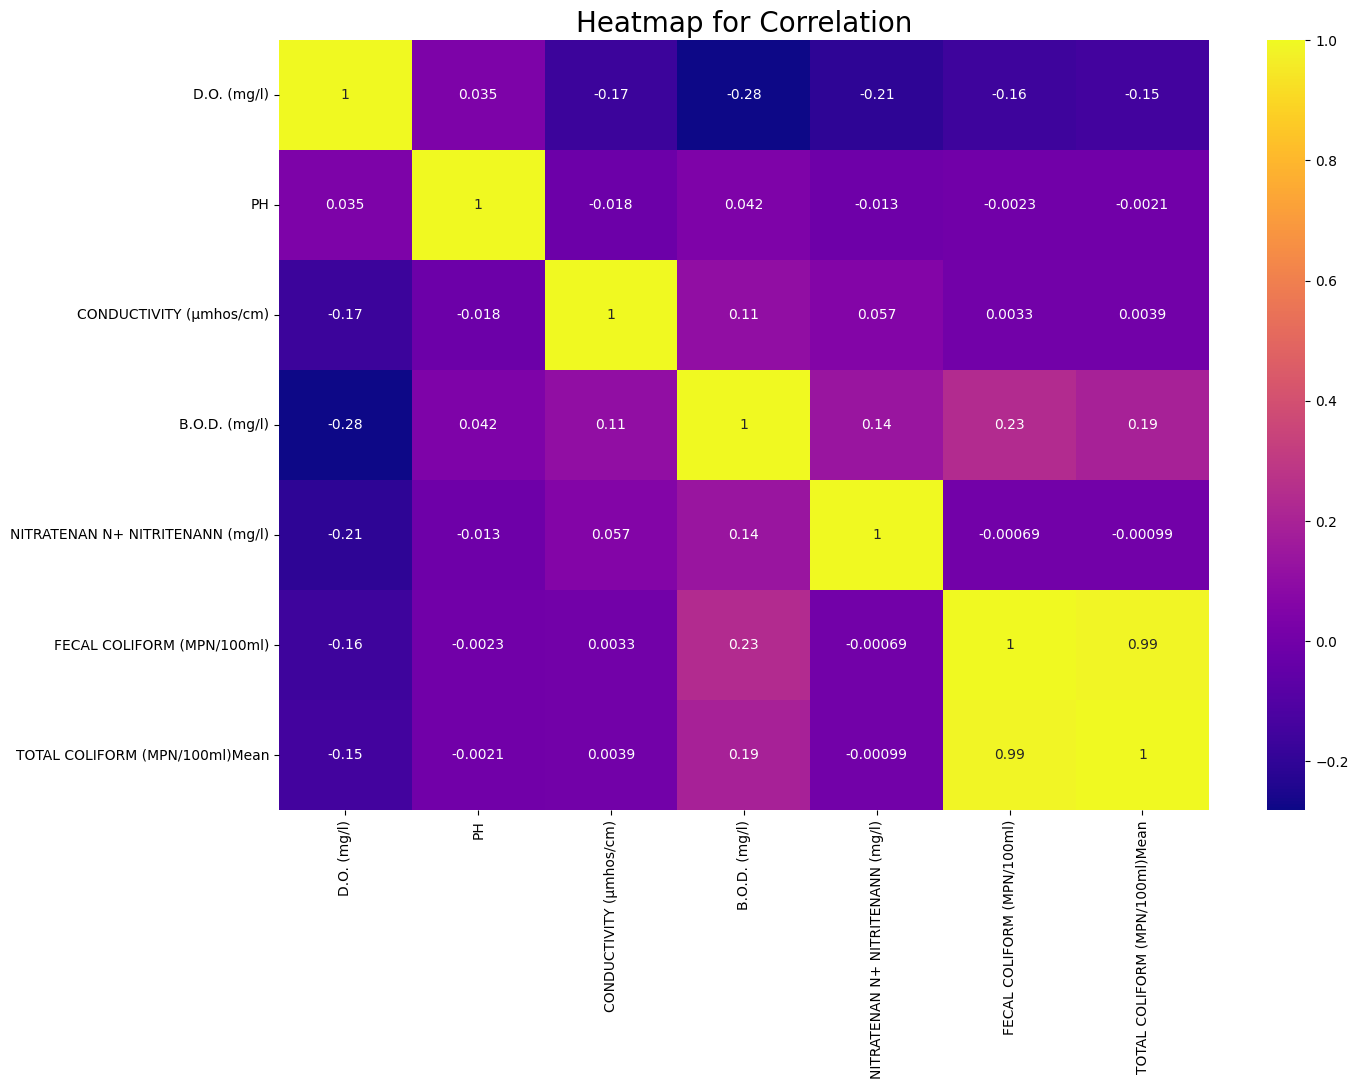

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Heatmap for Correlation", fontsize=20)
sns.heatmap(data.corr(),annot =True, cmap= "plasma")

### **Checking for null values in the data**

In [ ]:
data.isnull().sum()

D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          316
TOTAL COLIFORM (MPN/100ml)Mean      132
dtype: int64

### **Filling null values with the mean of columns**

In [ ]:
data['PH'] = data["PH"].fillna(data['PH'].mean())
data['D.O. (mg/l)'] = data["D.O. (mg/l)"].fillna(data['D.O. (mg/l)'].mean())
data['B.O.D. (mg/l)'] = data['B.O.D. (mg/l)'].fillna(data['B.O.D. (mg/l)'].mean())
data['CONDUCTIVITY (µmhos/cm)'] = data['CONDUCTIVITY (µmhos/cm)'].fillna(data['CONDUCTIVITY (µmhos/cm)'].mean())
data["NITRATENAN N+ NITRITENANN (mg/l)"]= data["NITRATENAN N+ NITRITENANN (mg/l)"].fillna(data['NITRATENAN N+ NITRITENANN (mg/l)'].mean())
data["FECAL COLIFORM (MPN/100ml)"]= data["FECAL COLIFORM (MPN/100ml)"].fillna(data['FECAL COLIFORM (MPN/100ml)'].mean())
data["TOTAL COLIFORM (MPN/100ml)Mean"] = data["TOTAL COLIFORM (MPN/100ml)Mean"].fillna(data['TOTAL COLIFORM (MPN/100ml)Mean'].mean())

In [ ]:
data.head(7)

,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,6.7,7.5,203.0,6.940049,0.1,11.0,27.0
1,5.7,7.2,189.0,2.000000,0.2,4953.0,8391.0
2,6.3,6.9,179.0,1.700000,0.1,3243.0,5330.0
3,5.8,6.9,64.0,3.800000,0.5,5382.0,8443.0
4,5.8,7.3,83.0,1.900000,0.4,3428.0,5500.0
5,5.5,7.4,81.0,1.500000,0.1,2853.0,4049.0
6,6.1,6.7,308.0,1.400000,0.3,3355.0,5672.0


In [ ]:
data.isnull().sum()

D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
dtype: int64

## **Renaming the columns**

In [ ]:
data = data.rename(columns={'D.O. (mg/l)': 'Dissolved oxygen', 'PH': 'pH','CONDUCTIVITY (µmhos/cm)':'Conductivity'
 ,'B.O.D. (mg/l)':'Biological oxygen demand','NITRATENAN N+ NITRITENANN (mg/l)':'Nitrate',
                            'FECAL COLIFORM (MPN/100ml)': 'Fecal coliform',
                            'TOTAL COLIFORM (MPN/100ml)Mean': 'Total coliform'})

In [ ]:
data.head()

,Dissolved oxygen,pH,Conductivity,Biological oxygen demand,Nitrate,Fecal coliform,Total coliform
0,6.7,7.5,203.0,6.940049,0.1,11.0,27.0
1,5.7,7.2,189.0,2.000000,0.2,4953.0,8391.0
2,6.3,6.9,179.0,1.700000,0.1,3243.0,5330.0
3,5.8,6.9,64.0,3.800000,0.5,5382.0,8443.0
4,5.8,7.3,83.0,1.900000,0.4,3428.0,5500.0


#### **Finding the value of Water Quality Index using the formula:** 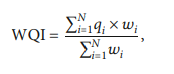


In [ ]:
qi = data[['Dissolved oxygen', 'pH', 'Conductivity','Biological oxygen demand','Nitrate'
,'Fecal coliform', 'Total coliform']].values  # Array of column values
wi = [0.2213,0.2604,0.0022, 0.4426,0.0492, 0.0221,0.0022] # unit weights of each column


In [ ]:
np.array(wi)

array([0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0221, 0.0022])

In [ ]:
qi

array([[6.70000000e+00, 7.50000000e+00, 2.03000000e+02, ...,
        1.00000000e-01, 1.10000000e+01, 2.70000000e+01],
       [5.70000000e+00, 7.20000000e+00, 1.89000000e+02, ...,
        2.00000000e-01, 4.95300000e+03, 8.39100000e+03],
       [6.30000000e+00, 6.90000000e+00, 1.79000000e+02, ...,
        1.00000000e-01, 3.24300000e+03, 5.33000000e+03],
       ...,
       [7.60000000e+00, 9.80000000e+01, 6.20000000e+00, ...,
        1.62307871e+00, 3.62529365e+05, 5.70000000e+02],
       [7.70000000e+00, 9.10000000e+01, 6.50000000e+00, ...,
        1.62307871e+00, 3.62529365e+05, 5.62000000e+02],
       [7.60000000e+00, 1.10000000e+02, 5.70000000e+00, ...,
        1.62307871e+00, 3.62529365e+05, 5.46000000e+02]])

In [ ]:
numerator = (qi* wi).sum(axis=1)

# Calculate the denominator of the WQI formula: ∑wi
denominator = sum(wi)

# Calculate the WQI: ∑(qi * wi) / ∑wi
wqi = numerator / denominator
data['WQI'] = wqi


# Function to classify WQI into categories
def classify_wqi(wqi_value):
    if wqi_value > 100:
        return 'Unsuitable for drinking'
    elif wqi >= 76:
        return 'Very Poor'
    elif wqi >= 51:
        return 'Poor'
    elif wqi >= 26:
        return 'Good'
    elif wqi_value >=0:
        return 'Excellent'
    else:
      return 'Invalid'
# Set custom thresholds for classification
thresholds = [26,51,76,100]

# Apply the classification function to WQI values
data['WQI_Category'] = pd.cut(data['WQI'], bins=[0] + thresholds + [float('inf')], labels=['Excellent', 'Good', 'Poor', 'Very Poor', 'Unsustainable for drinking'])


In [ ]:
data.head()

,Dissolved oxygen,pH,Conductivity,Biological oxygen demand,Nitrate,Fecal coliform,Total coliform,WQI,WQI_Category
0,6.7,7.5,203.0,6.940049,0.1,11.0,27.0,7.261396,Excellent
1,5.7,7.2,189.0,2.000000,0.2,4953.0,8391.0,132.368630,Unsustainable for drinking
2,6.3,6.9,179.0,1.700000,0.1,3243.0,5330.0,87.738390,Very Poor
3,5.8,6.9,64.0,3.800000,0.5,5382.0,8443.0,142.444380,Unsustainable for drinking
4,5.8,7.3,83.0,1.900000,0.4,3428.0,5500.0,92.086480,Very Poor


In [ ]:
data.isnull().sum()

Dissolved oxygen            0
pH                          0
Conductivity                0
Biological oxygen demand    0
Nitrate                     0
Fecal coliform              0
Total coliform              0
WQI                         0
WQI_Category                0
dtype: int64

In [ ]:
data['WQI_Category'].value_counts()


Excellent                     1083
Unsustainable for drinking     566
Good                           192
Poor                           105
Very Poor                       45
Name: WQI_Category, dtype: int64

In [ ]:
#data = data.dropna(subset=['WQI_Category'])

In [ ]:
#data.WQI_Category.isnull().sum()

In [ ]:
# normalizing the columns with Z_score
columns_to_normalize = ['Dissolved oxygen', 'pH', 'Conductivity','Biological oxygen demand','Nitrate'
,'Fecal coliform', 'Total coliform','WQI']
# Create StandardScaler object
scaler = StandardScaler()
# Fit the scaler to the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [ ]:
data.head()

,Dissolved oxygen,pH,Conductivity,Biological oxygen demand,Nitrate,Fecal coliform,Total coliform,WQI,WQI_Category
0,0.232467,-0.055791,-0.287073,0.000000,-0.395468,-0.045107,-0.038810,-0.044419,Excellent
1,-0.523859,-0.055951,-0.289611,-0.169917,-0.369503,-0.044492,-0.038202,-0.043816,Unsustainable for drinking
2,-0.070063,-0.056111,-0.291424,-0.180235,-0.395468,-0.044705,-0.038424,-0.044031,Very Poor
3,-0.448226,-0.056111,-0.312273,-0.108004,-0.291608,-0.044439,-0.038198,-0.043768,Unsustainable for drinking
4,-0.448226,-0.055898,-0.308828,-0.173356,-0.317573,-0.044682,-0.038412,-0.044010,Very Poor


### Classification upon ***WQI_Category*** column using Support Vector Machine

In [ ]:
X = data.drop(['WQI','WQI_Category'], axis=1)
y = data['WQI_Category']

# Train the model
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=101)

# Applying Different kernels
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.2).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=7, C=1).fit(X_train, y_train)


In [ ]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [ ]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (Polynomial Kernel):  63.21
F1 (Polynomial Kernel):  54.65
Accuracy (RBF Kernel):  68.39
F1 (RBF Kernel):  62.86


## **Regression using LSTM (Water quality index prediction)**

In [ ]:
X = data.drop(['WQI','WQI_Category'], axis=1)
y = data['WQI'].values

# Defining the parameters

shallow_hidden_layer_size = [30, 80]
hidden_units_2 = 200
hidden_units_1 = 350
delays = [1, 3, 4, 7]
max_iterations = 1500
max_epochs = 150

# Splitting X and yin training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y, train_size=0.70, test_size=0.30, random_state=101)
# model = Sequential()
# Create the LSTM model
model = Sequential()

# Add LSTM layers
for layer_size in shallow_hidden_layer_size:
    model.add(LSTM(layer_size, activation='tanh', input_shape=(X_train.shape[1], 1), return_sequences=True))

# Add the final LSTM layer
model.add(LSTM(hidden_units_2, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Add a dense layer for output
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=max_epochs, batch_size=32, verbose=1)

# Predict
predictions = model.predict(X_test)

Epoch 1/150
44/44 [==============================] - 13s 10ms/step - loss: 0.5733
Epoch 2/150
44/44 [==============================] - 0s 7ms/step - loss: 0.5494
Epoch 3/150
44/44 [==============================] - 0s 8ms/step - loss: 0.5256
Epoch 4/150
44/44 [==============================] - 0s 8ms/step - loss: 0.3917
Epoch 5/150
44/44 [==============================] - 0s 7ms/step - loss: 0.1644
Epoch 6/150
44/44 [==============================] - 0s 7ms/step - loss: 0.0509
Epoch 7/150
44/44 [==============================] - 0s 7ms/step - loss: 0.0159
Epoch 8/150
44/44 [==============================] - 0s 7ms/step - loss: 0.0090
Epoch 9/150
44/44 [==============================] - 0s 7ms/step - loss: 0.0098
Epoch 10/150
44/44 [==============================] - 0s 7ms/step - loss: 0.0077
Epoch 11/150
44/44 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 12/150
44/44 [==============================] - 0s 7ms/step - loss: 0.0065
Epoch 13/150
44/44 [===============

In [ ]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.6007623903878256


## **Applying Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
X = data.drop(['WQI','WQI_Category'], axis=1)
y = data['WQI_Category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Naive Bayes: ', "%.2f" % (accuracy*100),'%')

Accuracy of Naive Bayes:  84.28 %
